In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/Users/kaustubhmestri/Projects/Zomato Intelligence/data/processed/zomato_processed.csv")

df.head()

,Unnamed: 0,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,...,rating_color,rating_text,votes,cost_per_person,rating_weighted,cuisine_count,online_delivery,table_booking,price_category,success
0,0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Dark Green,Excellent,314,550.0,27.612349,3,0,1,Premium,1
1,1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Dark Green,Excellent,591,600.0,28.725780,1,0,1,Premium,1
2,2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Green,Very Good,270,2000.0,24.649323,4,0,1,Luxury,1
3,3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,...,Dark Green,Excellent,365,750.0,28.922903,2,0,0,Premium,1
4,4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,...,Dark Green,Excellent,229,750.0,26.102781,2,0,1,Premium,1


In [3]:
cluster_features = [
    "cost_per_person",
    "aggregate_rating",
    "votes",
    "cuisine_count",
    "online_delivery"
]

X = df[cluster_features]


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.cluster import KMeans

inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


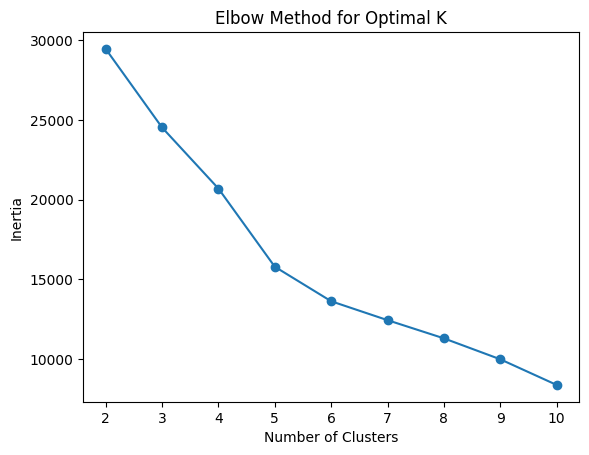

In [6]:
plt.plot(range(2, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["cluster"] = clusters


In [8]:
cluster_summary = df.groupby("cluster")[cluster_features].mean()
cluster_summary


,cost_per_person,aggregate_rating,votes,cuisine_count,online_delivery
cluster,,,,,
0,282.006516,3.144213,45.647533,1.761092,0.000000
1,450.770611,4.036680,365.204150,2.748177,0.021873
2,23858.966942,4.239669,2802.735537,2.710744,0.330579
3,334.684754,3.348989,157.892794,2.360281,1.000000


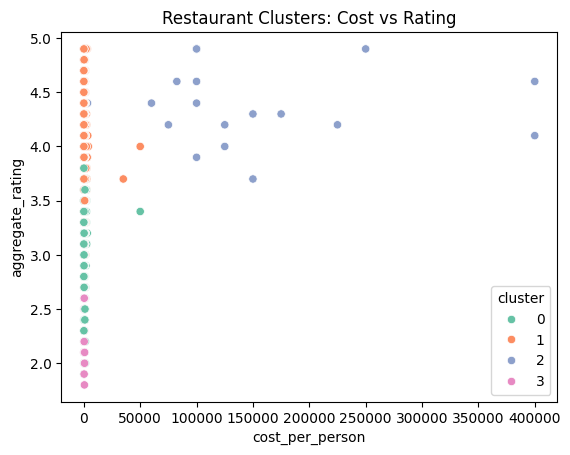

In [9]:
sns.scatterplot(
    data=df,
    x="cost_per_person",
    y="aggregate_rating",
    hue="cluster",
    palette="Set2"
)
plt.title("Restaurant Clusters: Cost vs Rating")
plt.show()


In [10]:
df.to_csv("/Users/kaustubhmestri/Projects/Zomato Intelligence/data/processed/zomato_with_clusters.csv", index = False)